In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-reviews-dataset/yelp.csv


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

In [3]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Step 2: Load and Preprocess Data
# a. Load dataset and select required columns
df = pd.read_csv('../input/yelp-reviews-dataset/yelp.csv')
df = df[['text', 'stars']]


In [5]:
# Convert stars to binary sentiment
df['sentiment'] = df['stars'].apply(lambda x: 1 if x >= 4 else 0)
df = df[['text', 'sentiment']]

In [6]:
# b. Remove stop words and clean text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

df['text'] = df['text'].apply(preprocess_text)


In [7]:
# c. Text to sequence conversion
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

In [8]:
# Pad sequences
max_len = 1000
X = pad_sequences(sequences, maxlen=max_len)
Y = df['sentiment'].values

In [9]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Step 3: Build and Train CNN Model
# a. CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.7))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 393ms/step - accuracy: 0.6700 - loss: 0.6324 - val_accuracy: 0.7550 - val_loss: 0.5055
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 384ms/step - accuracy: 0.8135 - loss: 0.4356 - val_accuracy: 0.8020 - val_loss: 0.4258
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 390ms/step - accuracy: 0.9401 - loss: 0.1890 - val_accuracy: 0.8160 - val_loss: 0.4456
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 383ms/step - accuracy: 0.9900 - loss: 0.0554 - val_accuracy: 0.8105 - val_loss: 0.5672
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 392ms/step - accuracy: 0.9978 - loss: 0.0168 - val_accuracy: 0.8065 - val_loss: 0.7007


In [11]:
# Step 4: Build and Train LSTM Model
# b. LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_len))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.7))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.6872 - loss: 0.6014 - val_accuracy: 0.8150 - val_loss: 0.4125
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8869 - loss: 0.2939 - val_accuracy: 0.8160 - val_loss: 0.4528
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.9469 - loss: 0.1640 - val_accuracy: 0.7875 - val_loss: 0.5443
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.9734 - loss: 0.0860 - val_accuracy: 0.7820 - val_loss: 0.6844
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9767 - loss: 0.0754 - val_accuracy: 0.7915 - val_loss: 0.7526


In [12]:
# Step 5: Evaluate Models
# a. Calculate accuracy for both models
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, Y_test)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, Y_test)

print(f'CNN Test Accuracy: {cnn_accuracy}')
print(f'LSTM Test Accuracy: {lstm_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8056 - loss: 0.7659
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.7944 - loss: 0.7379
CNN Test Accuracy: 0.8065000176429749
LSTM Test Accuracy: 0.7914999723434448


In [13]:
# Step 6: Plot Training Process
# CNN Accuracy and Loss
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

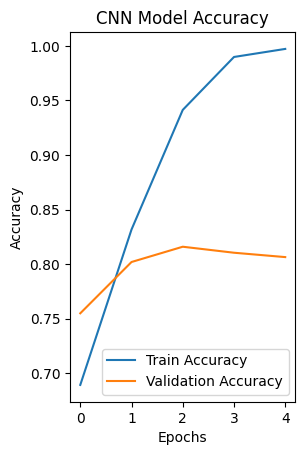

In [14]:
# Plot CNN accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

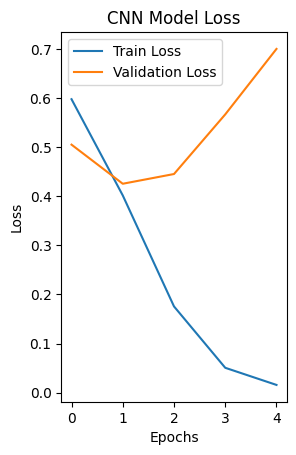

In [15]:
# Plot CNN loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [16]:
# LSTM Accuracy and Loss
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

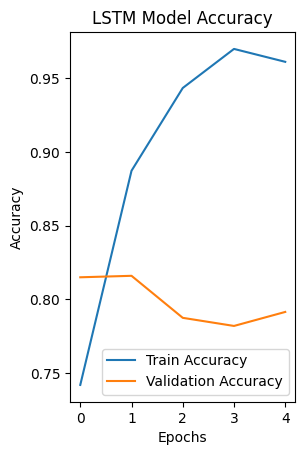

In [17]:
# Plot LSTM accuracy
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

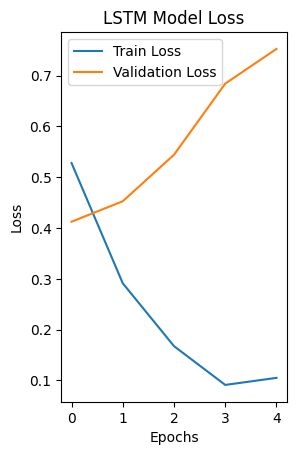

In [18]:
# Plot LSTM loss
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
